In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_csv("/content/drive/MyDrive/task 6/Assignment10_data/trainKNN.txt", header=None )
df = df.drop(columns = 0)
df.head(2)

,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [9]:
df.isnull().sum()
df[10].unique()

array([1, 2, 3, 5, 6, 7])

In [10]:
df.describe()

,1,2,3,4,5,6,7,8,9,10
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [32]:
X_train = df[[1,2,3,4,5,6,7,8,9]].values
y_train = df[10].values

In [20]:
df_test = pd.read_csv("/content/drive/MyDrive/task 6/Assignment10_data/testKNN.txt", header=None)
df_test = df_test.drop(columns = 0)
df_test.head(2)


,1,2,3,4,5,6,7,8,9,10
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1


In [21]:
df_test.describe()

,1,2,3,4,5,6,7,8,9,10
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,1.517412,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


In [34]:
X_test = df_test[[1,2,3,4,5,6,7,8,9]].values
y_test = df_test[10].values

In [29]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6111111111111112

In [ ]:
!pip install mlxtend

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [60]:
import numpy as np
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    print("K value :" ,i , "train score :" , knn.score(X_train, y_train), "cv score:", np.mean(cross_val_score(knn, X_train, y_train, cv = 5, scoring = "accuracy")))


K value : 1 train score : 1.0 cv score: 0.6380769230769231
K value : 2 train score : 0.8418367346938775 cv score: 0.6585897435897436
K value : 3 train score : 0.8520408163265306 cv score: 0.6738461538461538
K value : 4 train score : 0.7959183673469388 cv score: 0.6687179487179487
K value : 5 train score : 0.8010204081632653 cv score: 0.6482051282051282
K value : 6 train score : 0.7806122448979592 cv score: 0.6634615384615384
K value : 7 train score : 0.7346938775510204 cv score: 0.6330769230769231
K value : 8 train score : 0.7551020408163265 cv score: 0.6382051282051282
K value : 9 train score : 0.7244897959183674 cv score: 0.6432051282051281
K value : 10 train score : 0.7142857142857143 cv score: 0.6432051282051282
K value : 20 train score : 0.6938775510204082 cv score: 0.5769230769230769
K value : 50 train score : 0.6224489795918368 cv score: 0.4641025641025641


In [55]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    print("K value :" ,i , "train score :" , knn.score(X_train, y_train), "cv score:", np.mean(cross_val_score(knn, X_train, y_train, cv = 5, scoring = "f1_weighted")))


K value : 1 train score : 1.0 cv score: 0.6235749817398993
K value : 2 train score : 0.8418367346938775 cv score: 0.6254971703261735
K value : 3 train score : 0.8520408163265306 cv score: 0.6477323616716406
K value : 4 train score : 0.7959183673469388 cv score: 0.6342111675910199
K value : 5 train score : 0.8010204081632653 cv score: 0.6085671788178421
K value : 6 train score : 0.7806122448979592 cv score: 0.6223024344854584
K value : 7 train score : 0.7346938775510204 cv score: 0.5899126281597546
K value : 8 train score : 0.7551020408163265 cv score: 0.5957222024179318
K value : 9 train score : 0.7244897959183674 cv score: 0.6012477982186579
K value : 10 train score : 0.7142857142857143 cv score: 0.5997713086860091
K value : 20 train score : 0.6938775510204082 cv score: 0.5147763535832316
K value : 50 train score : 0.6224489795918368 cv score: 0.40296249478131285


In [74]:
# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# Scale the data
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the KNN models
knn_euclidean = KNeighborsClassifier(metric='euclidean')
knn_euclidean.fit(X_train, y_train)

knn_manhattan = KNeighborsClassifier(metric='manhattan')
knn_manhattan.fit(X_train, y_train)

# Predict on the test data
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)

# Evaluate the models
accuracy_euclidean = metrics.accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = metrics.accuracy_score(y_test, y_pred_manhattan)

print('Accuracy of Euclidean Distance KNN:', accuracy_euclidean)
print('Accuracy of Manhattan Distance KNN:', accuracy_manhattan)

classification_report_euclidean = metrics.classification_report(y_test, y_pred_euclidean)

classification_report_manhattan = metrics.classification_report(y_test, y_pred_manhattan)

# print('Classification report of Euclidean Distance KNN:', classification_report_euclidean)
# print('Classification report of Manhattan Distance KNN:', classification_report_manhattan)
from prettytable import PrettyTable

# Create a table
table1 = PrettyTable()

# Add headers to the table
table1.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

# split classification report into rows
rows = classification_report_euclidean.split("\n")

for row in rows[2:-2]:
    try:
        table1.add_row(row.split())
    except ValueError:
        continue
print("Euclidean\n",table1)

table2 = PrettyTable()

table2.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

rows = classification_report_manhattan.split("\n")

for row in rows[2:-2]:
    try:
        table2.add_row(row.split())
    except ValueError:
        continue
print("manhattan\n",table2)


Accuracy of Euclidean Distance KNN: 0.5555555555555556
Accuracy of Manhattan Distance KNN: 0.5555555555555556
Euclidean
 +-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   1   |    0.60   |  1.00  |   0.75   |    3    |
|   2   |    0.29   |  0.67  |   0.40   |    3    |
|   3   |    0.00   |  0.00  |   0.00   |    3    |
|   5   |    1.00   |  0.33  |   0.50   |    3    |
|   6   |    1.00   |  0.33  |   0.50   |    3    |
|   7   |    0.75   |  1.00  |   0.86   |    3    |
+-------+-----------+--------+----------+---------+
manhattan
 +-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   1   |    0.43   |  1.00  |   0.60   |    3    |
|   2   |    0.40   |  0.67  |   0.50   |    3    |
|   3   |    0.00   |  0.00  |   0.00   |    3    |
|   5   |    1.00   |  0.33  |   0.5

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


AttributeError: ignored

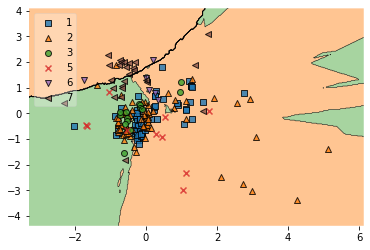

In [87]:
import matplotlib as plt 
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

# Use PCA to reduce the number of features to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
# Retrain the classifier with the PCA-transformed data
knn.fit(X_train_pca, y_train)

# Plot the decision regions using the PCA-transformed data
# plot_decision_regions(X_train_pca, y_train, clf=knn, legend=2)
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.title("knn")
# plt.show()


# # Select two features from X_train
X_train_2d = X_train[:, [0, 1]]

# Plot the decision regions using the selected features
plot_decision_regions(X_train_2d, y_train, clf=knn, legend=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("knn")
plt.show()